## Import the library 

In [16]:
# import the library 

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#plt.style.use('presentation')
sns.set(style="white")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 2000)
from datetime import datetime

## Open the data

In [17]:
df = pd.read_csv('all_data.csv')

In [18]:
#df = df.set_index(pd.to_datetime(df.index))

## Set the date as index

In [19]:
df=df.set_index(df.Date)

## Take just the last 12 years

In [20]:
df=df[df.index >= '2008-01-01']

In [21]:
df.index

Index(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01', '2008-05-01',
       '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
       ...
       '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
       '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object', name='Date', length=140)

In [22]:
df.index.freq='MS'

## First 5 rows from the data frame 

In [52]:
df.head()

,Date,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Motor Gasoline Consumed by the Transportation Sector(T/ B per Day),Motor Gasoline Consumed by the Commercial Sector(T/ B per Day),Motor Gasoline Consumed by the Industrial Sector(T/ B per Day),Rigs Count
Date,,,,,,,,,,,,
2008-01-01,2008-01-01,110296,9081,455,3.09450,9081.0,8986,0,8658.095,23.469,128.301,321
2008-02-01,2008-02-01,116094,9035,435,3.10500,9035.4,8861,0,8713.483,23.619,129.122,331
2008-03-01,2008-03-01,115409,9162,349,3.31350,9162.0,8713,0,8910.054,24.152,132.034,343
2008-04-01,2008-04-01,108439,9257,381,3.50725,9257.0,8892,0,8955.271,24.275,132.705,358
2008-05-01,2008-05-01,104424,9303,396,3.85720,9303.0,8964,0,9091.726,24.645,134.727,375


## Last 5 rows from the data frame

In [8]:
df.tail()

,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Motor Gasoline Consumed by the Transportation Sector(T/ B per Day),Motor Gasoline Consumed by the Commercial Sector(T/ B per Day),Motor Gasoline Consumed by the Industrial Sector(T/ B per Day),Rigs Count
Date,,,,,,,,,,,
2019-04-01,20890,9484,102,2.903333,9484.666667,10046,647,9016.374,196.235,143.766,824
2019-05-01,22230,9456,161,2.935600,9456.600000,10134,617,9059.136,197.166,144.448,802
2019-06-01,22406,9690,34,2.779750,9690.750000,10266,665,9322.894,202.906,148.653,790
2019-07-01,22372,9482,30,2.830333,9482.000000,10061,661,9139.469,198.914,145.728,782
2019-08-01,22391,9716,100,2.695600,9716.000000,10294,685,9463.929,205.976,150.902,760


# EDA 

##  Exploring the data

In [200]:
# EDA the data by exploring the shape .
print('the shape of data',df.shape)

the shape of data (314, 11)


## Data information

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 1993-07-01 to 2019-08-01
Freq: MS
Data columns (total 11 columns):
Weekly U.S. Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)                                 314 non-null int64
U.S. Gasoline Demand (Thousand Barrels per Day)                                                          314 non-null int64
Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)                               314 non-null int64
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)                     314 non-null float64
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)                      314 non-null float64
Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)    314 non-null int64
Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)                               314 non-null i

## Cheking the missing value

In [202]:
df.isnull().sum()

Weekly U.S. Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)                                 0
U.S. Gasoline Demand (Thousand Barrels per Day)                                                          0
Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)                               0
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)                     0
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)                      0
Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)    0
Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)                               0
Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)                                       0
Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)                                           0
Motor Gasoline Consumed by the Indust

## Statistics describing data

In [53]:
df.describe()

,Weekly U.S. Ending Stocks of Finished Motor Gasoline (Thousand Barrels),U.S. Gasoline Demand (Thousand Barrels per Day),Weekly U.S. Imports of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Product Supplied of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline (Thousand Barrels per Day),Weekly U.S. Exports of Finished Motor Gasoline (Thousand Barrels per Day),Motor Gasoline Consumed by the Transportation Sector(T/ B per Day),Motor Gasoline Consumed by the Commercial Sector(T/ B per Day),Motor Gasoline Consumed by the Industrial Sector(T/ B per Day),Rigs Count
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,49520.435714,9069.442857,100.135714,2.975145,9069.826905,9412.621429,402.314286,8814.233414,94.539750,136.462036,833.057143
std,27076.421507,352.274812,100.379654,0.580264,352.258892,514.444080,274.084587,296.386434,85.594383,9.365613,410.799550
min,20890.000000,8072.000000,9.000000,1.713500,8072.750000,8342.000000,0.000000,8042.273000,19.655000,105.477000,187.000000
25%,25456.500000,8861.750000,36.000000,2.528187,8862.262500,8978.250000,200.750000,8637.203250,23.913250,131.937000,458.000000
50%,44358.000000,9081.500000,61.000000,2.881375,9081.750000,9314.000000,411.500000,8843.046000,28.634000,138.511000,764.500000
75%,70234.000000,9304.250000,118.250000,3.512438,9304.437500,9881.250000,600.750000,8994.461000,196.358250,143.166250,1272.500000
max,116094.000000,9760.000000,490.000000,4.125250,9760.250000,10294.000000,1043.000000,9463.929000,210.561000,150.902000,1596.000000


## Data type

In [152]:
df.dtypes

Weekly U.S. Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)                                   int64
U.S. Gasoline Demand (Thousand Barrels per Day)                                                            int64
Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)                                 int64
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)                     float64
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)                      float64
Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)      int64
Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)                                 int64
Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)                                       float64
Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)                                  

## The correlation between The Features

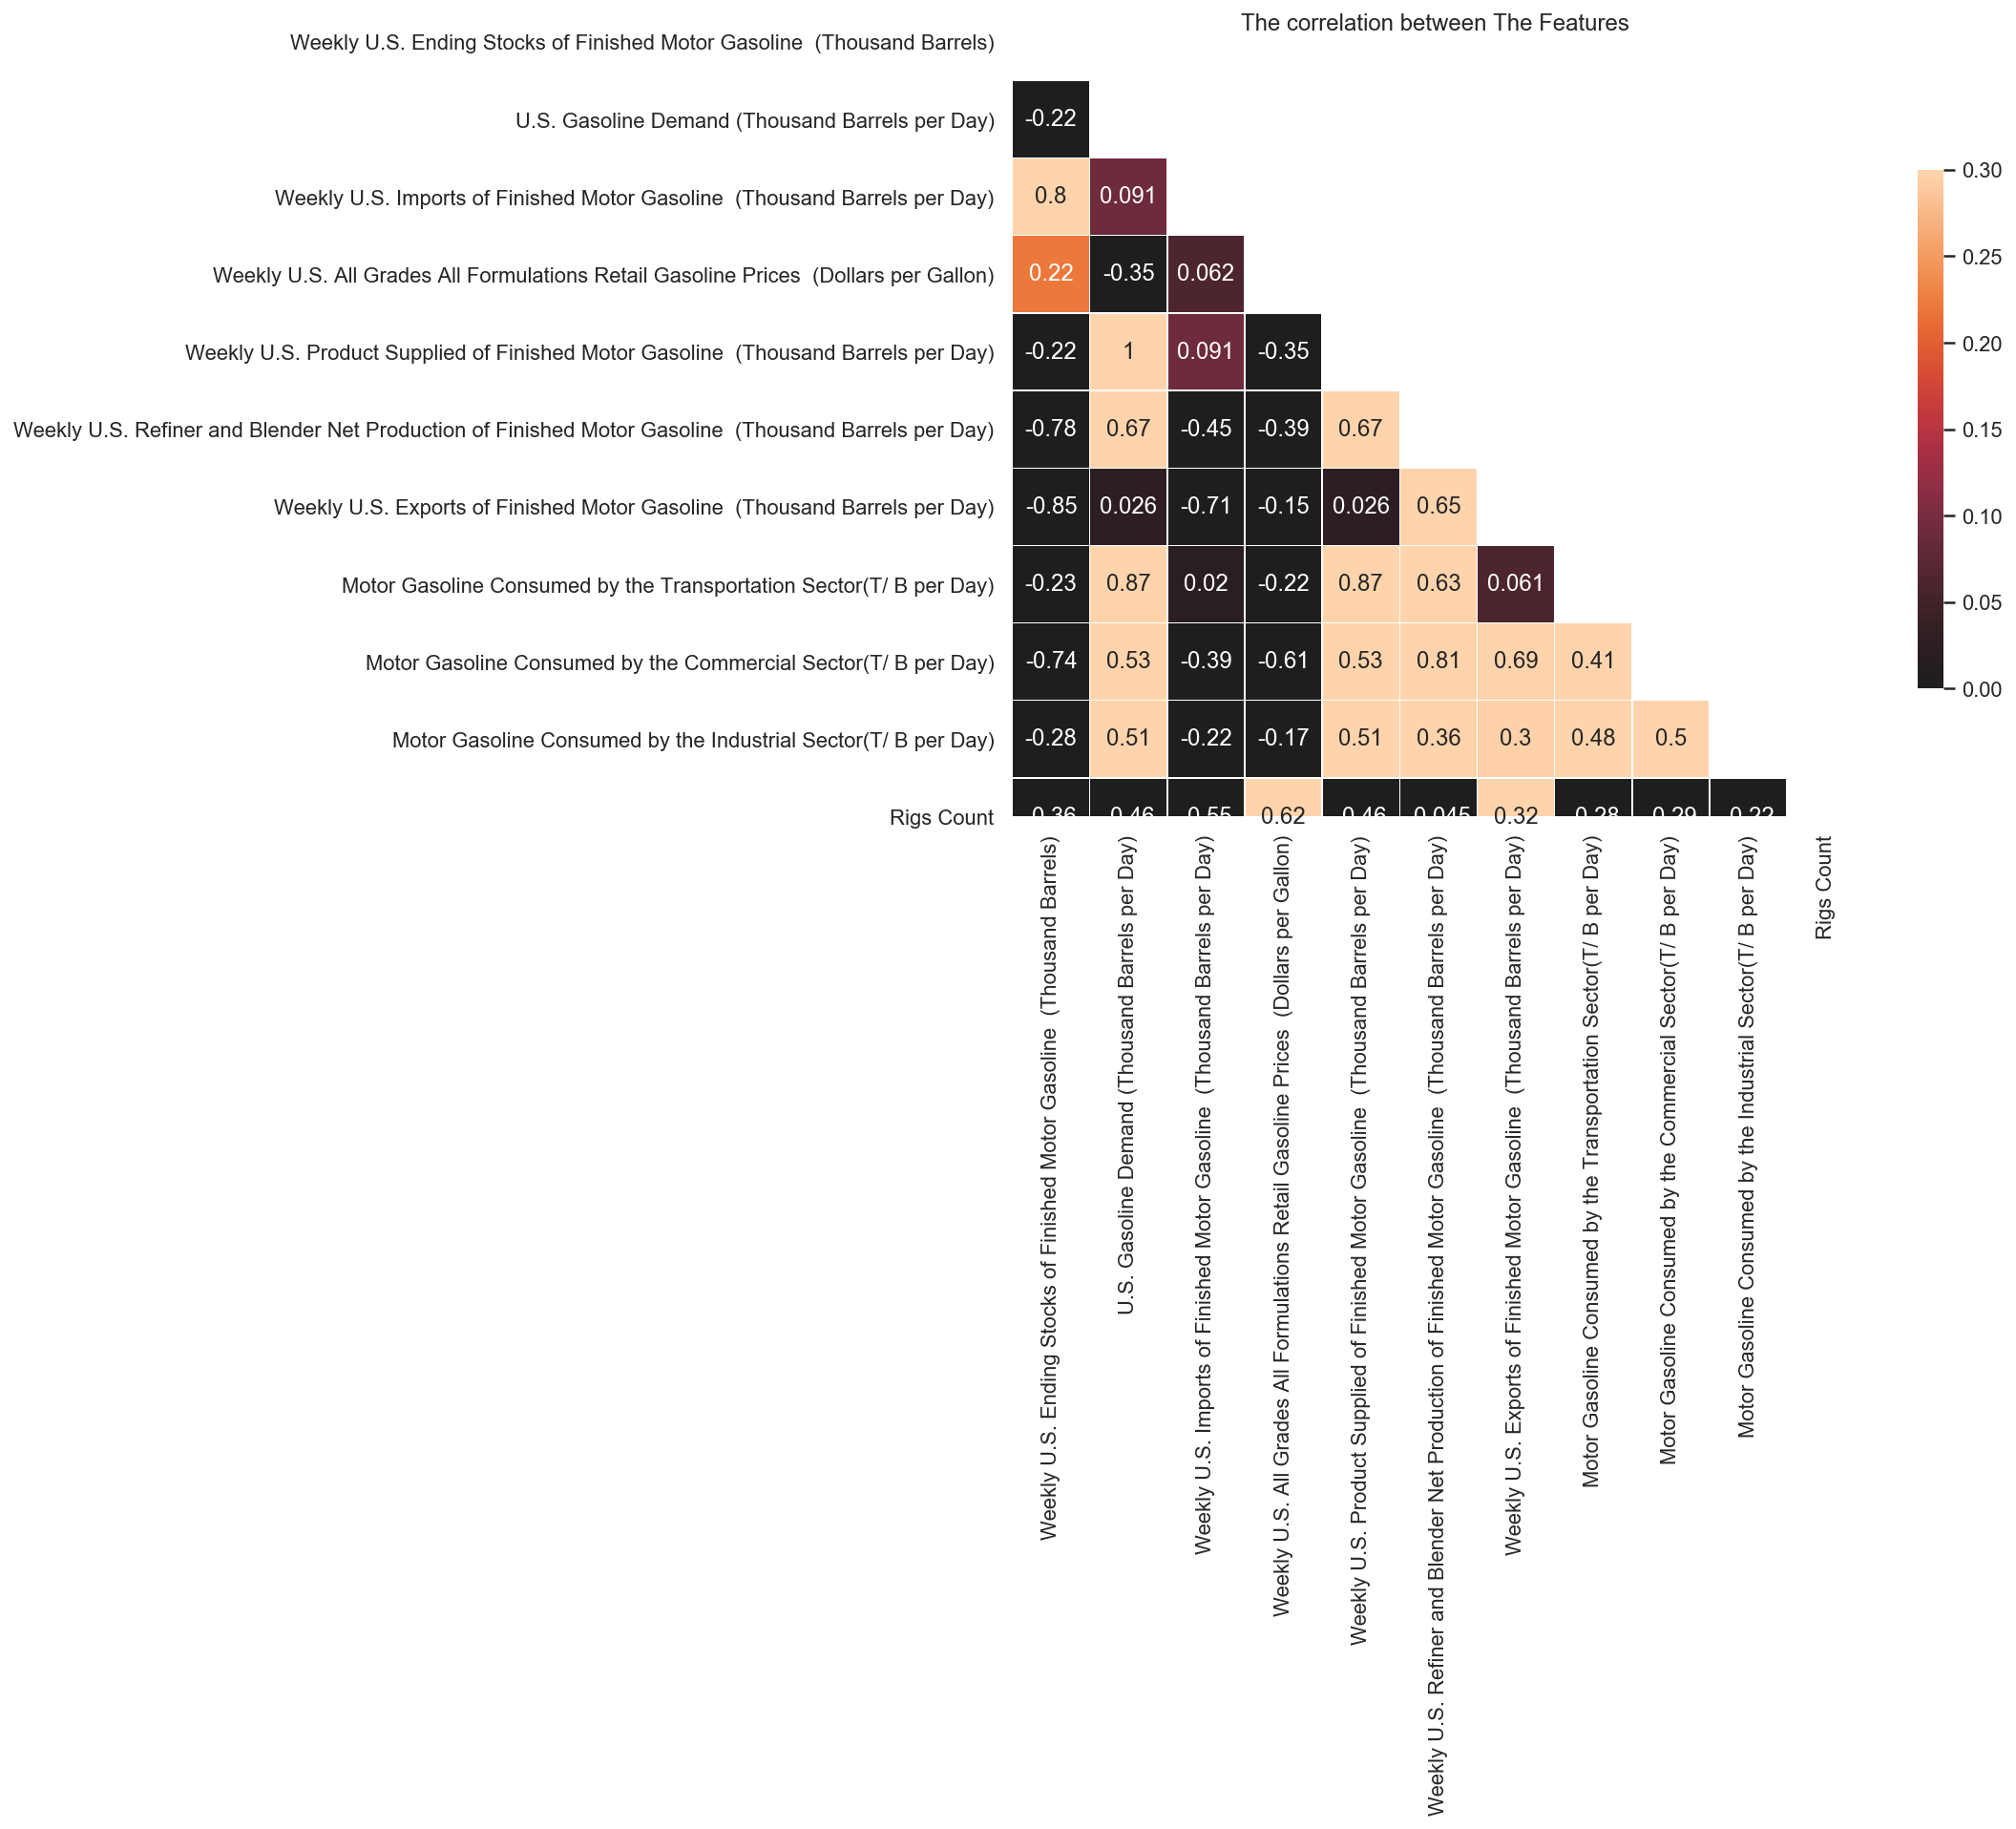

In [26]:
sns.set(style="white")
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True,ax=ax,mask=mask,linecolor='w',vmin =0, vmax =.3,center=0,
            square=True, linewidths=.2,cbar_kws={"shrink": .5})
ax.set_title('The correlation between The Features ')
plt.show()

## Descriptive Data Analysis

see all style availabel

In [81]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## Data Distributions

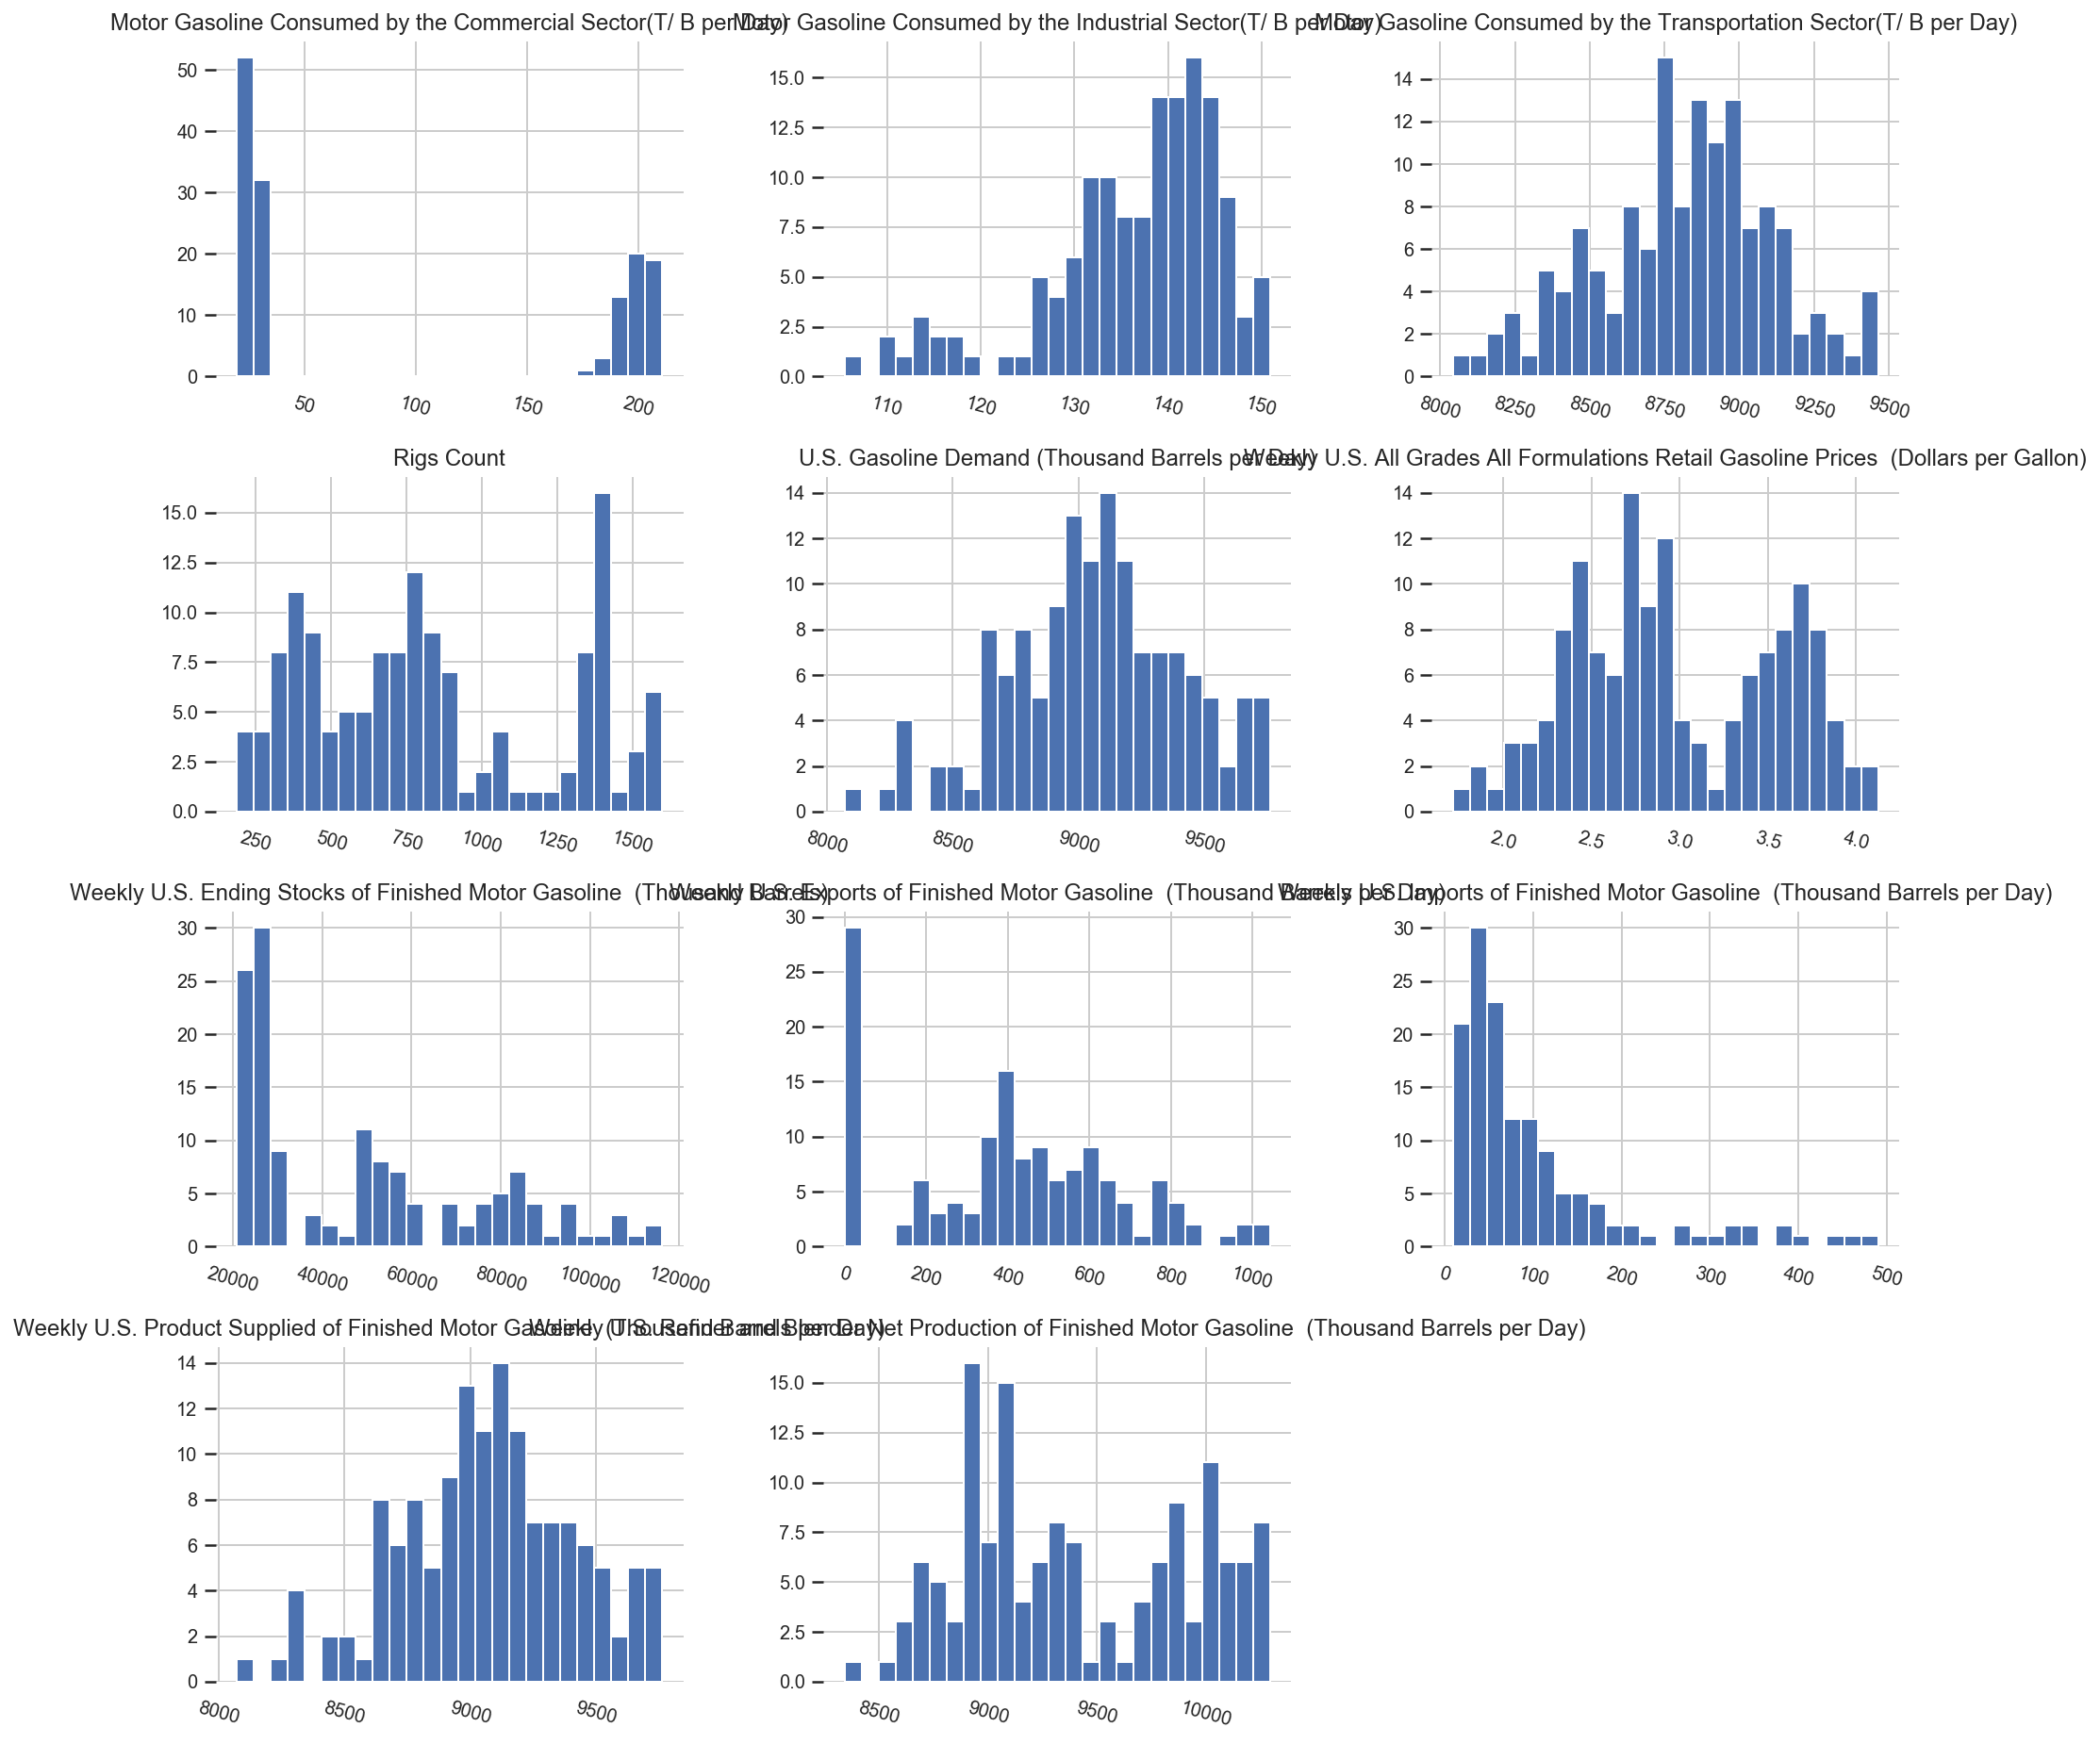

In [23]:
sns.set(style="white")
h=df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Lest we see the sector that consumes more gasoline

## Take The Mean of gasoline consumption for each sector

In [54]:
Transportation =df['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'].mean()
Commercial =df['Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)'].mean()
Industrial = df['Motor Gasoline Consumed by the Industrial Sector(T/ B per Day)'].mean()

## Importing library for plotly plots

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objects as go

## Percentage of gasoline consumption for each sector

In [159]:
colors = ['#66b3ff','#008B8B','#d62728','#8FBC8F','#D2B48C']
labels = ['Commercial', 'Transportation', 'Industrial']
values = [Commercial, Transportation, Industrial]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(marker=dict(colors=colors, line=dict(color='#F8F8FF', width=2)))
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Percentage of gasoline consumption for each sector from 2008 -2019",
    width=800,
)
fig.show()

Transportation sector is consumes 97.4% it almost 100% comparing with commercial and industrial

## Gasoline consumption by Transportation for two years

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df.Date,
                y=df['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'],
                name='Industrial',
                line_color='#008B8B',
                opacity=0.9))


# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2017-01-01','2019-01-01'],
                  title_text='Gasoline consumption by Transportation for two years')
fig.show()

Domestic gasoline Transportation  consumption was subdued in January, most likely because of bad weather and snow affecting large parts of the country at the beginning and end of the month.

## Consumed by the Industrial vs. Commercial

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df.Date,
                y=df['Motor Gasoline Consumed by the Industrial Sector(T/ B per Day)'],
                name='Industrial',
                line_color='#008B8B',
                opacity=0.9))

fig.add_trace(go.Scatter(
                x=df.Date,
                y=df['Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)'],
                name='Commercial',
                line_color='#66b3ff',
                opacity=0.9))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
                  title_text='Consumed by the Industrial vs. Commercial')
fig.show()

## Gasoline consumption for each sector

In [158]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Motor Gasoline Consumed by the Commercial Sector(T/ B per Day)'],
    name="Commercial",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Motor Gasoline Consumed by the Industrial Sector(T/ B per Day)'],
    name="Industrial",
    line_color='#d62728',
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'],
    name="Transportation",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.9, 0.9]
    ),
    yaxis=dict(
        title="Commercial             .",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis2=dict(
        title=".                        Industrial",
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.00099
    ),
    yaxis3=dict(
        title="Transportation",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Gasoline consumption for each sector",
    width=800,
)

fig.show()

- In 2015, 40% of all the energy consumed in the United States went to powering homes and commercial buildings.
- In 2014  the industry  sector suffered  since crude oil prices began their plunge from more than $100/bbl

## Is Gasoline Consumption Affected by the Change in its Price?

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'],
    name="Prices",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'],
    name="Transportation",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.8, 0.80]
    ),
    yaxis=dict(
        title="Retail Gasoline Prices",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis3=dict(
        title="Transportation",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Consumption by Transportation vs. Prices",
    width=800,
)

fig.show()

AS shown, There is negative relationship between the consumption and gasoline prices.

## Gasoline Imports vs. Exports

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)'],
    name="Exports",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. Imports of Finished Motor Gasoline  (Thousand Barrels per Day)'],
    name="Imports",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.8, 0.80]
    ),
    yaxis=dict(
        title="Exports",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis3=dict(
        title="Imports",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Gasoline Imports vs. Exports",
    width=800,
)

fig.show()

What is the reason for the decrease in gasoline imports at the beginning of 2010 and the start of exports?

Between 2009 and 2014, The gasoline industry changed significantly because of the “shale revolution.” Crude oil extracted from shale formations using hydraulic fracturing techniques has led to expanded domestic production.

## Gasoline consumption vs. Production vs. Exports

In [157]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)'],
    name="Production",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. Exports of Finished Motor Gasoline  (Thousand Barrels per Day)'],
    name="Exports",
    line_color='#d62728',
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'],
    name="Transportation",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.9, 0.9]
    ),
    yaxis=dict(
        title="Production             .",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis2=dict(
        title=".                        Exports",
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.00099
    ),
    yaxis3=dict(
        title="Transportation",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Gasoline consumption vs. Production vs. Exports",
    width=800,
)

fig.show()

Here we can clearly see the effect of increased production to cover consumption and start exports.

## Production & Rigs Count

In [151]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. Refiner and Blender Net Production of Finished Motor Gasoline  (Thousand Barrels per Day)'],
    name="Production",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Rigs Count'],
    name="Rigs Count",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.8, 0.80]
    ),
    yaxis=dict(
        title="Production",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis3=dict(
        title="Rigs Count",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Production vs. Rigs Count",
    width=800,
)

fig.show()

## Prices & Rigs Count

In [162]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'],
    name="Prices",
    line_color='#66b3ff',
))


fig.add_trace(go.Scatter(
    x=df.Date,
    y=df['Rigs Count'],
    name="Rigs Count",
    line_color='#008B8B',
    yaxis="y3"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.8, 0.80]
    ),
    yaxis=dict(
        title="Prices",
        titlefont=dict(
            color='#66b3ff'
        ),
        tickfont=dict(
            color='#66b3ff'
        )
    ),
    yaxis3=dict(
        title="Rigs Count",
        titlefont=dict(
            color='#008B8B'
        ),
        tickfont=dict(
            color='#008B8B'
        ),
        anchor="x",
        overlaying="y",
        side="right"
    )
)

# Update layout properties
fig.update_layout(xaxis_range=['2008-01-01','2020-01-01'],
    title_text="Prices vs. Rigs Count",
    width=800,
)

fig.show()

As shown, There is positive relationship between number of  rigs and gasoline prices.